# Definición de trayectorias para el Robot Delta de la UPB

Este cuaderno requiere que el lector comprenda la teoría descrita en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_Teoria.ipynb

y partimos de la solución desarrollada en:

https://nbviewer.jupyter.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/Delta/RobotDelta_CinInv.ipynb

![DeltaGIF](https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/OmronDeltaTrajectory.gif "deltaGif")

Abrir aquí si no se visualiza bien: https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/OmronDeltaTrajectory.gif

Video Original: https://www.youtube.com/embed/8X7KsumRn24','100%','500

## Objetivo

Definir trayectorias simples y compuestas usando distintas formas de interpolación

## Trayectoria simple

- Problema inicial: hacer que el robot vaya de la posición inicial $HOME$ a $P = [0,0,HOME_Z -200]$ mm siguiendo una línea recta, teniendo en cuenta que $HOME = [0,0,-528 mm]$.


### Importar módulos e inicializar

In [395]:
%reset -sf
# Activar esta magia en Jupyter para generar gráfica interactiva
# En Spyder, comentar esta línea
%matplotlib notebook

In [396]:
import numpy as np
import matplotlib.pyplot as plt
#para realizar animaciones
from matplotlib.animation import FuncAnimation
#para gráficas 3D
from mpl_toolkits.mplot3d import Axes3D

### Creación del lienzo 3D

<IPython.core.display.Javascript object>


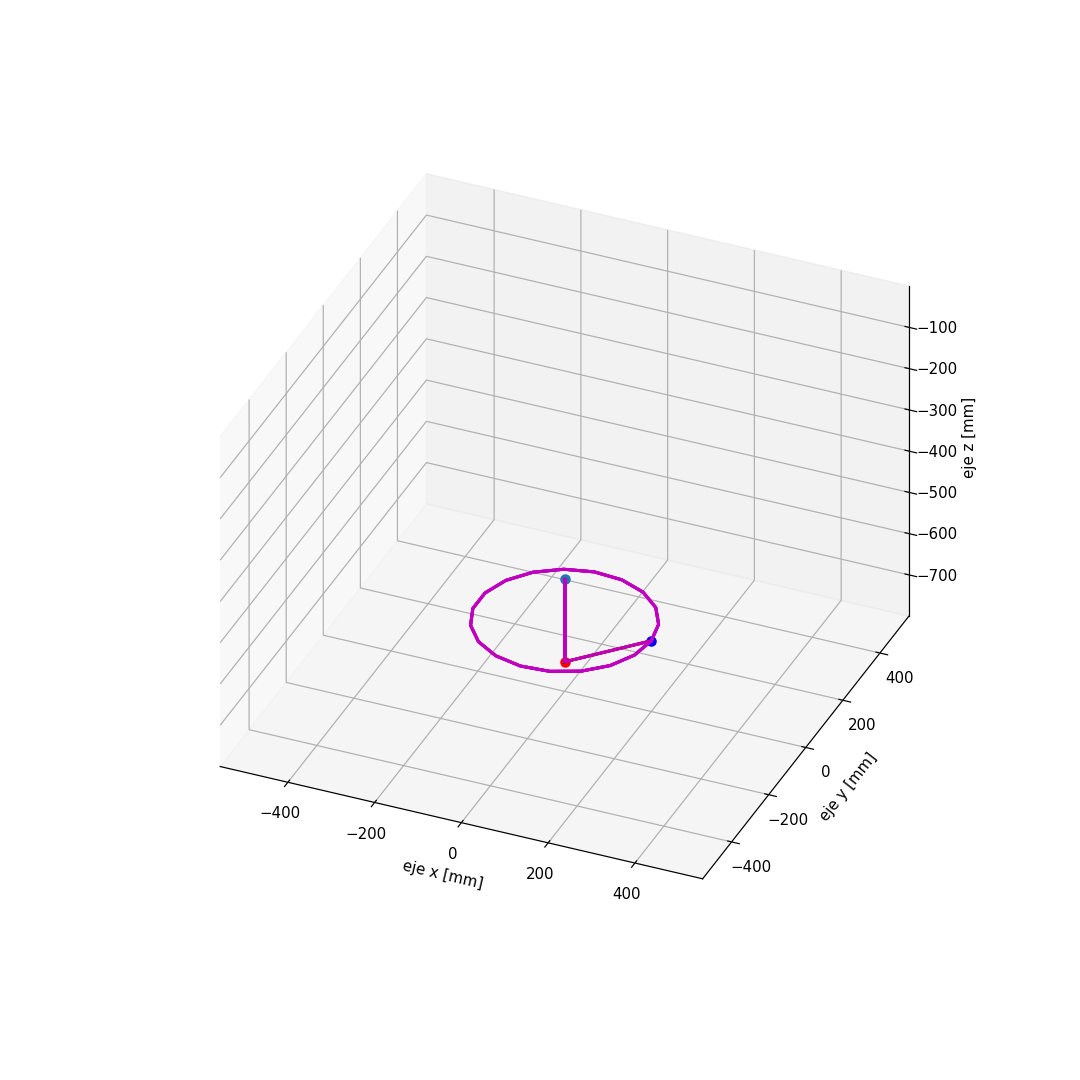

Text(0.5, 0, 'eje z [mm]')

In [397]:
fig1 = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
ax1 = fig1.add_subplot(111,projection = '3d', proj_type = 'ortho')

ax1.view_init(elev=30, azim=315)
fEscala = 1.39
ax1.set_xlim3d(-400*fEscala,400*fEscala)
ax1.set_ylim3d(-400*fEscala,400*fEscala)
ax1.set_zlim3d(-800,0)
ax1.set_xlabel("eje x [mm]")
ax1.set_ylabel("eje y [mm]")
ax1.set_zlabel("eje z [mm]")

### Definición de punto inicial

<IPython.core.display.Javascript object>


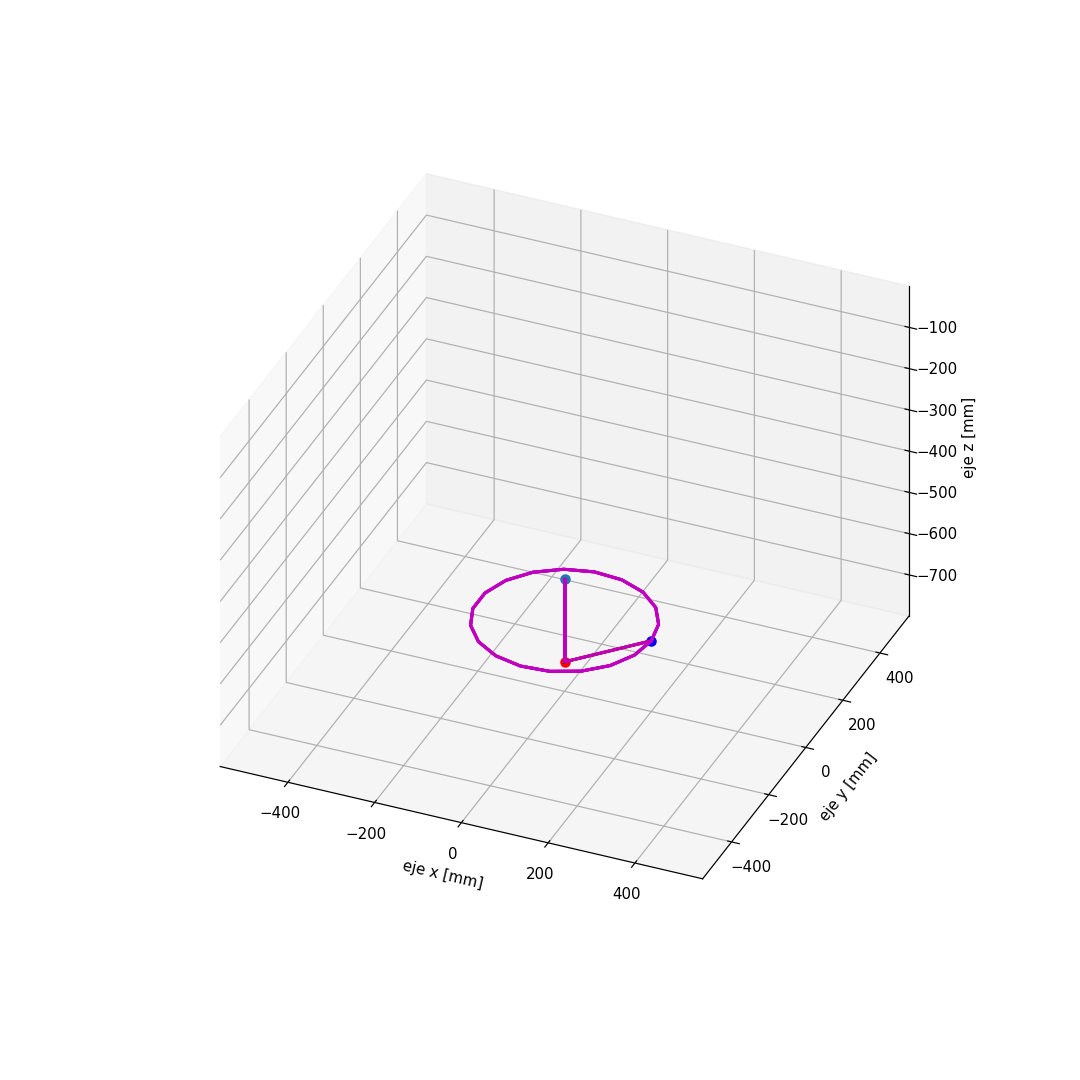

In [398]:
px0 = 0
py0 = 0
pz0 = -528.67

ax1.plot([px0],[py0],[pz0],'o')
fig1

### Definición del punto final

<IPython.core.display.Javascript object>


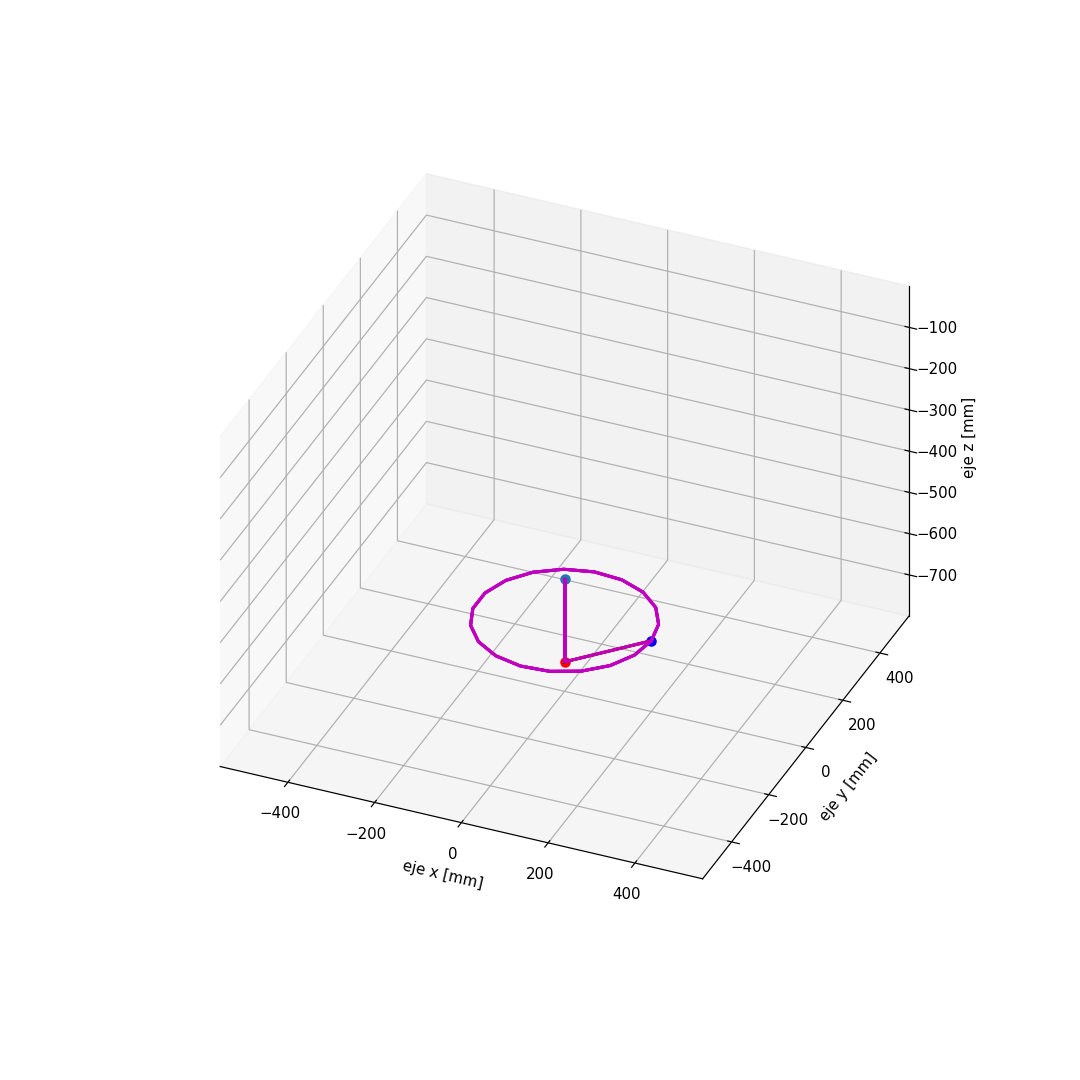

In [399]:
px1 = 0
py1 = 0
pz1 = pz0 - 200

ax1.plot([px1],[py1],[pz1],'ro')
fig1

### interpolación

Debemos definir un número de puntos intermedios para que el robot pueda desplazarse de forma recta. Para esto usaremos la función de interpolación lineal "linspace". 
- Primero debemos definir el número de puntos intermedios que tendrá la trayectoria, 
- luego usaremos la función en sí.

<IPython.core.display.Javascript object>


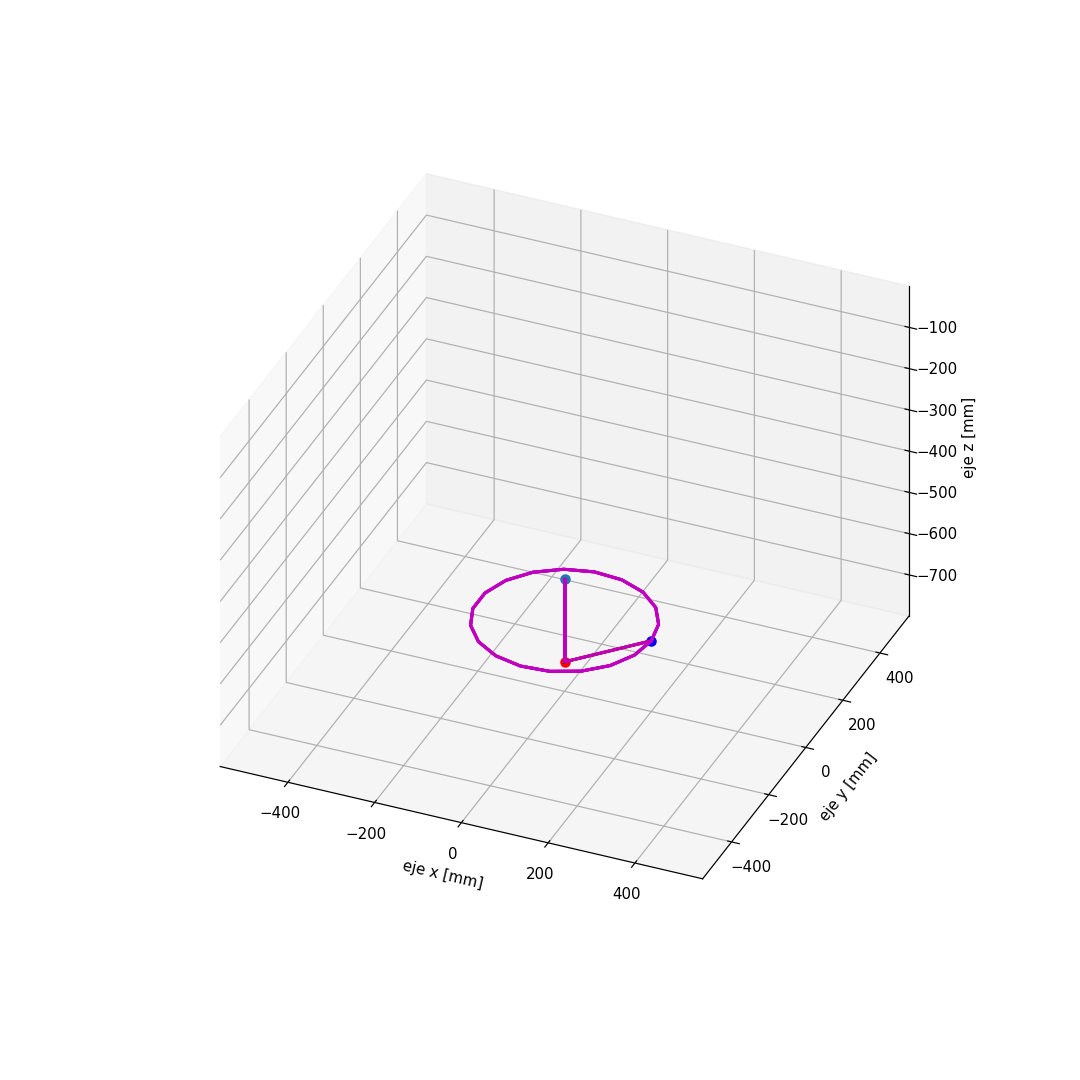

In [400]:
numpos = 20

px1v = np.linspace(px0,px1,numpos)
py1v = np.linspace(py0,py1,numpos)
pz1v = np.linspace(pz0,pz1,numpos)

ax1.plot(px1v,py1v,pz1v,'-m',linewidth = 2)
fig1

Ahora hagamos una trayectoria para ir al punto medio entre $HOME$ y $P1$ en el eje $z$, $x = HOME_x+200$

<IPython.core.display.Javascript object>


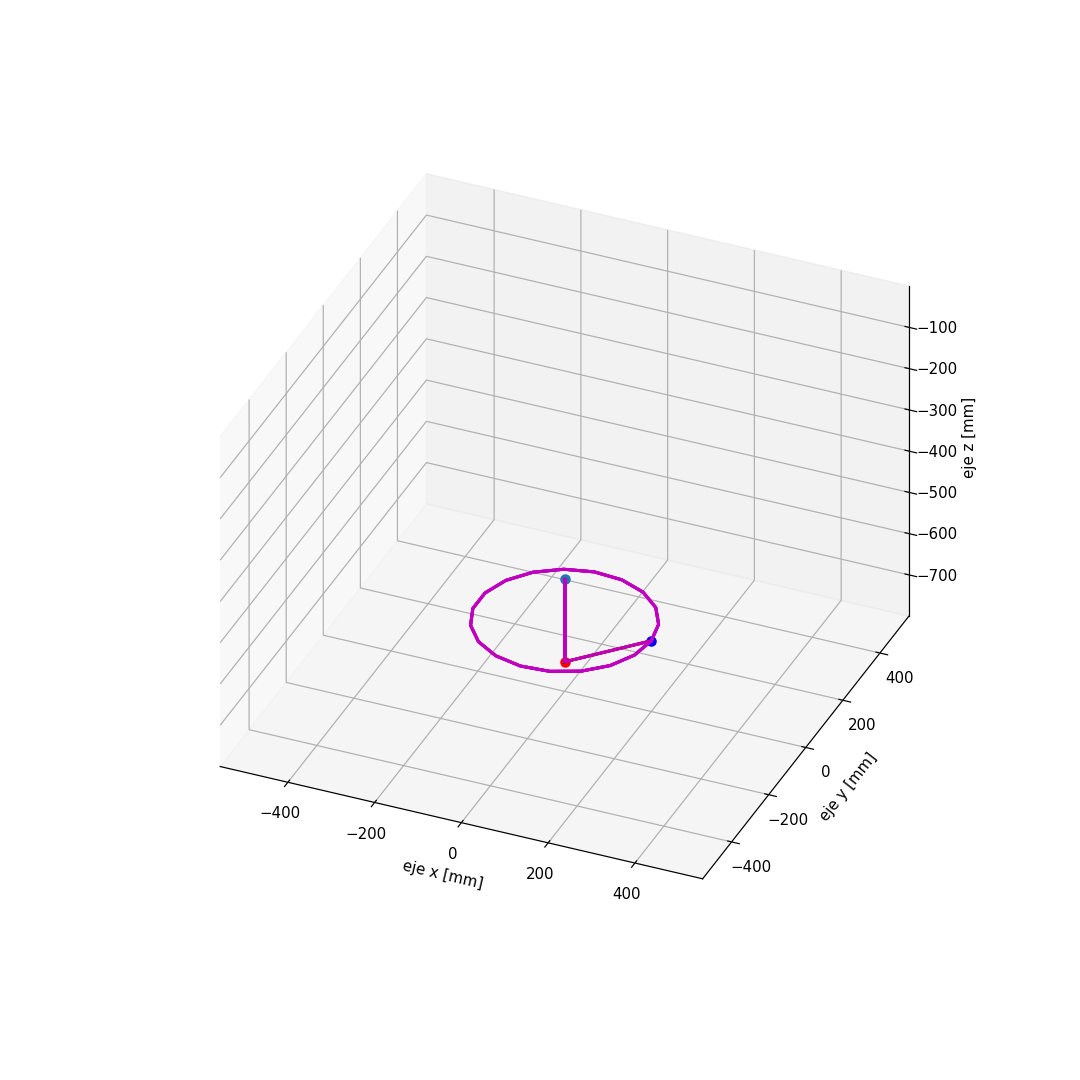

In [401]:
px2 = 200
py2 = 0
pz2 = pz1-(pz1-pz0)/2

px2v = np.linspace(px1,px2,numpos)
py2v = np.linspace(py1,py2,numpos)
pz2v = np.linspace(pz1,pz2,numpos)

ax1.plot([px2],[py2],[pz2],'bo')
ax1.plot(px2v,py2v,pz2v,'-k',linewidth = 2)
fig1

## Trayectorias compuestas

se componen de trayectorias simples. Numéricamente, debemos unificar los vectores usando la función "append" de numpy

In [402]:
print("trayectorias individuales: ",pz1v,pz2v)

trayectorias individuales:  [-528.67       -539.19631579 -549.72263158 -560.24894737 -570.77526316
 -581.30157895 -591.82789474 -602.35421053 -612.88052632 -623.40684211
 -633.93315789 -644.45947368 -654.98578947 -665.51210526 -676.03842105
 -686.56473684 -697.09105263 -707.61736842 -718.14368421 -728.67      ] [-728.67       -723.40684211 -718.14368421 -712.88052632 -707.61736842
 -702.35421053 -697.09105263 -691.82789474 -686.56473684 -681.30157895
 -676.03842105 -670.77526316 -665.51210526 -660.24894737 -654.98578947
 -649.72263158 -644.45947368 -639.19631579 -633.93315789 -628.67      ]


In [403]:
pxv = np.append(px1v,px2v)
pyv = np.append(py1v,py2v)
pzv = np.append(pz1v,pz2v)
print("trayectoria compuesta:",pzv)

trayectoria compuesta: [-528.67       -539.19631579 -549.72263158 -560.24894737 -570.77526316
 -581.30157895 -591.82789474 -602.35421053 -612.88052632 -623.40684211
 -633.93315789 -644.45947368 -654.98578947 -665.51210526 -676.03842105
 -686.56473684 -697.09105263 -707.61736842 -718.14368421 -728.67
 -728.67       -723.40684211 -718.14368421 -712.88052632 -707.61736842
 -702.35421053 -697.09105263 -691.82789474 -686.56473684 -681.30157895
 -676.03842105 -670.77526316 -665.51210526 -660.24894737 -654.98578947
 -649.72263158 -644.45947368 -639.19631579 -633.93315789 -628.67      ]


<IPython.core.display.Javascript object>


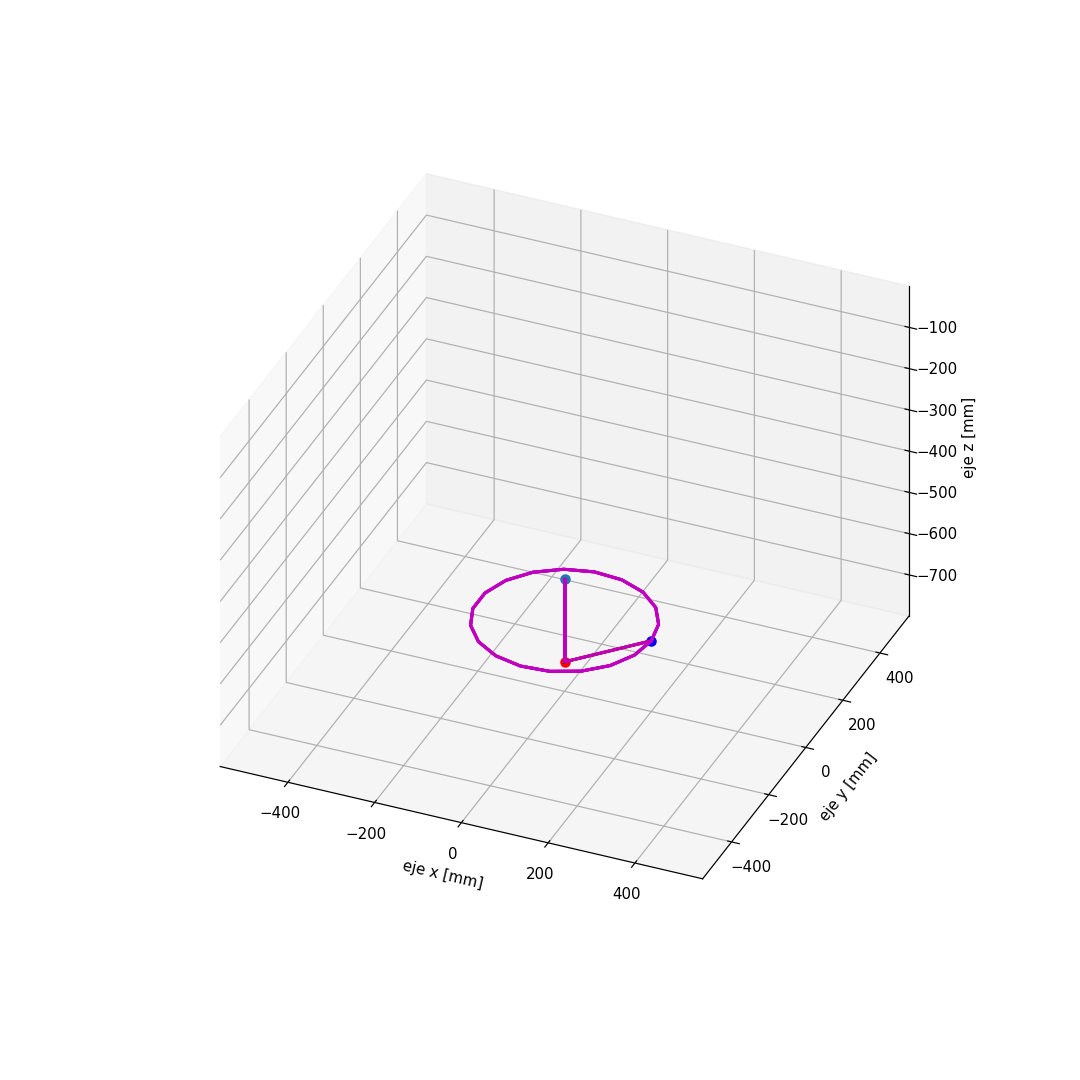

In [404]:
ax1.plot(pxv,pyv,pzv,'-r',linewidth = 2)
fig1

### Ejemplo: trayectoria circunferencia

Definir una trayectoria en una circunferencia:
- de radio $r$ mm
- Inicia en P2
- Termina en P3
- Debe tener 20 puntos

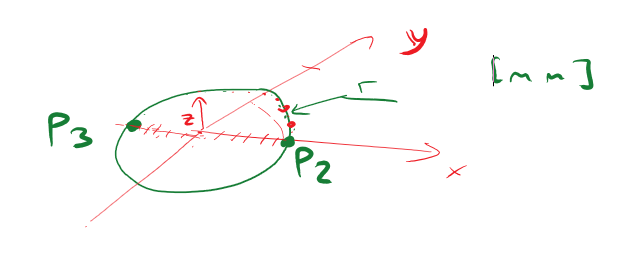

#### En cartesianas

In [405]:
r = 200
px3 = -r
py3 = 0
pz3 = pz2

# px3v = np.linspace(px2,px3,numpos)
# py3v = np.sqrt(r**2 - px3v**2)
# pz3v = pz3 + np.zeros(numpos)

# ax1.plot(px3v,py3v,pz3v,'-r',linewidth = 2)
# fig1

#### En polares

<IPython.core.display.Javascript object>


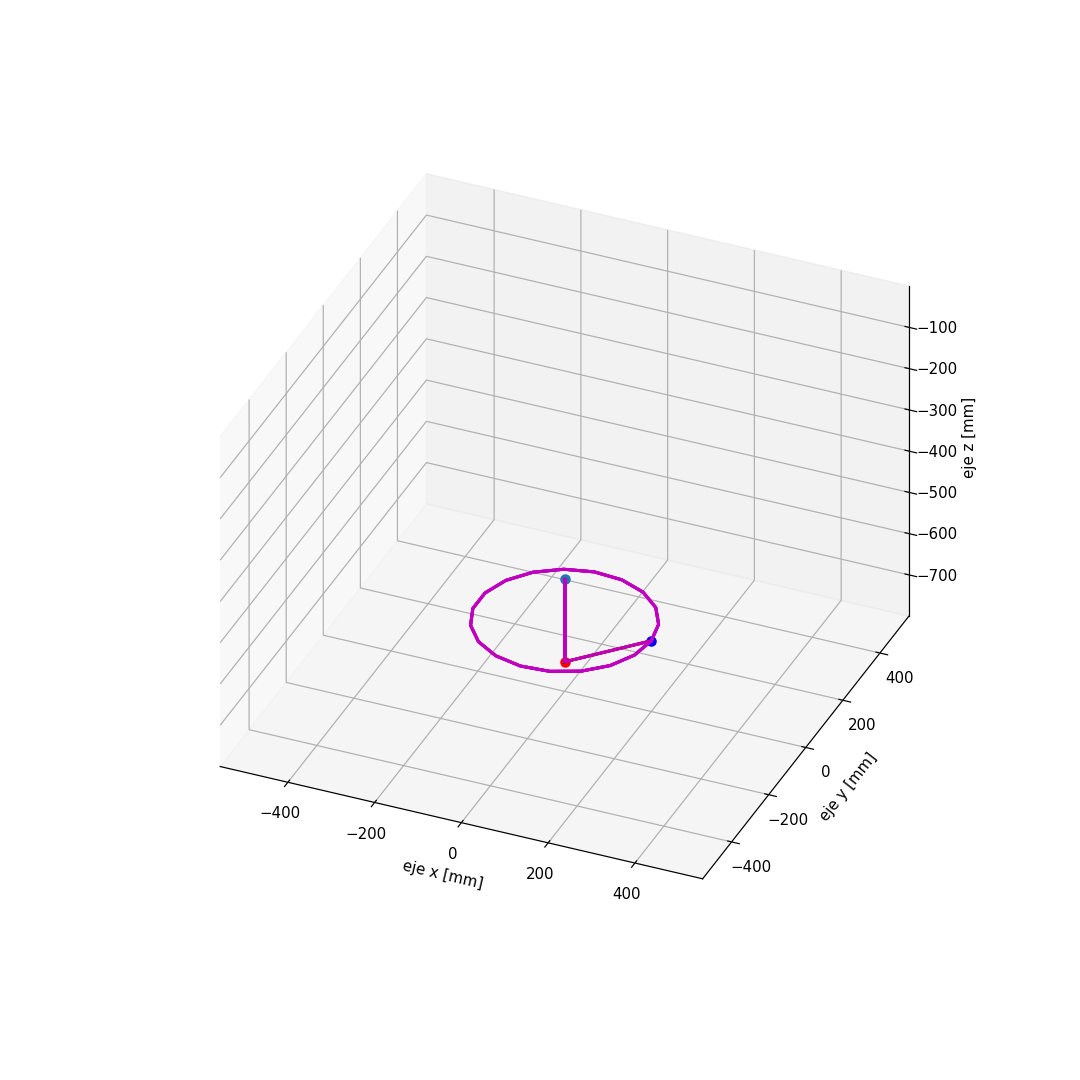

In [408]:
alpha = np.linspace(0,2*np.pi,numpos)
px3v = r*np.cos(alpha)
py3v = r*np.sin(alpha)
pz3v = pz2 + np.zeros(numpos)

ax1.plot(px3v,py3v,pz3v,'-m',linewidth = 2)
fig1

#### Ahora la trayectoria compuesta incluyendo la circunferencia

<IPython.core.display.Javascript object>


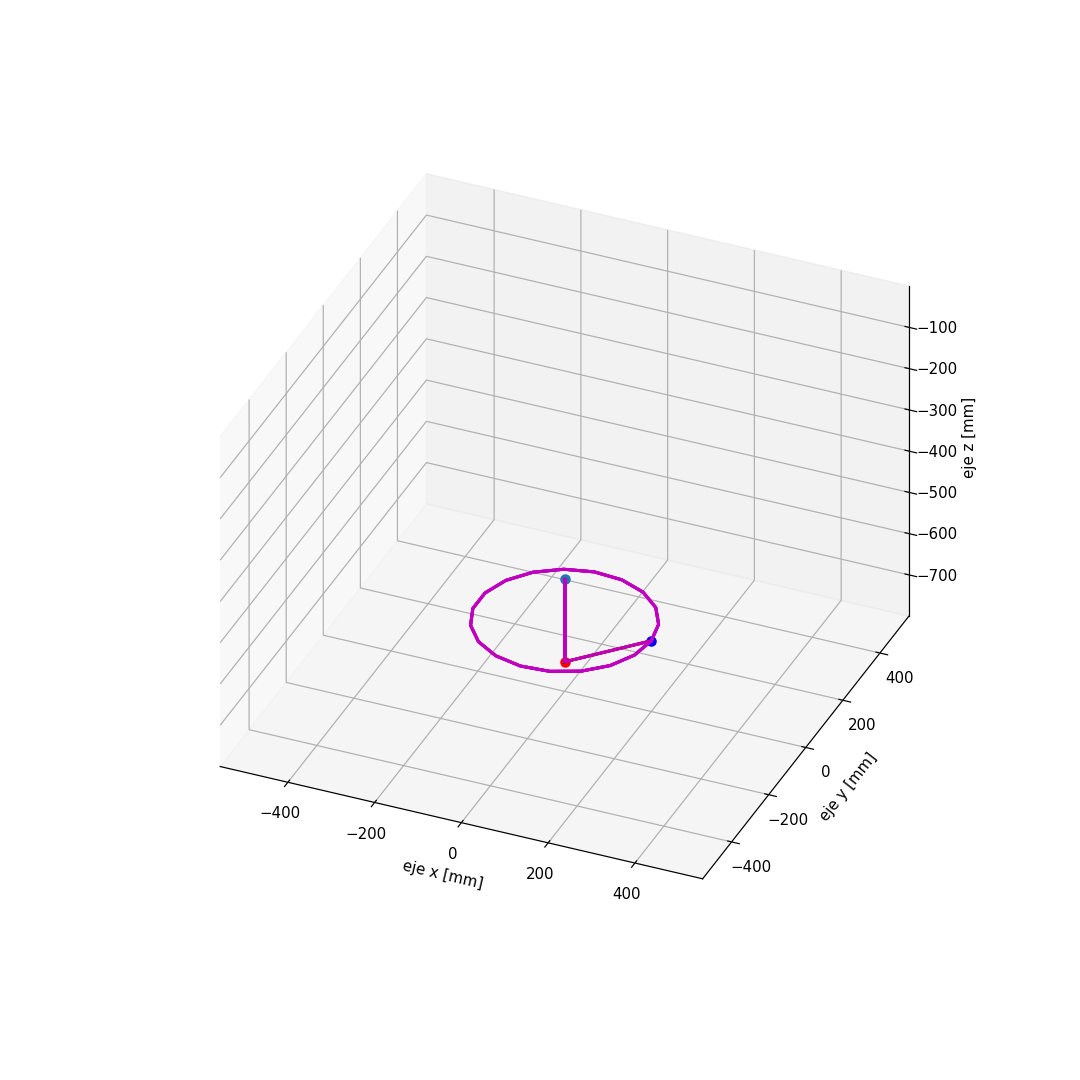

In [409]:
pxv = np.append(pxv,px3v)
pyv = np.append(pyv,py3v)
pzv = np.append(pzv,pz3v)

ax1.plot(pxv,pyv,pzv,'-m',linewidth = 2)
fig1

In [410]:
pxv,pyv,pzv

(array([   0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,   10.52631579,   21.05263158,   31.57894737,
          42.10526316,   52.63157895,   63.15789474,   73.68421053,
          84.21052632,   94.73684211,  105.26315789,  115.78947368,
         126.31578947,  136.84210526,  147.36842105,  157.89473684,
         168.42105263,  178.94736842,  189.47368421,  200.        ,
         200.        ,  189.16344834,  157.82810188,  109.38963162,
          49.09709743,  -16.51586909,  -80.33908493, -135.45631433,
        -175.89475024, -197.27226068, -197.27226068, -175.89475024,
        -135.45631433,  -80.33908493,  -16.51586909,   49.09709743,
         109.38963162,  157.82810188,  189.16344

### Ejercicio

Completar la trayectoria magenta para que regrese a $HOME$